In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pymc as pm
import scipy.stats as sts

## Data

In [ ]:
data=pd.read_csv('ba_lands_2014-2018.csv')

In [ ]:
data

,LAT,LON,M2,USD,NEIGHBORHOOD,COMMUNE,YEAR
0,-58.389511,-34.626804,301.0,145000.0,CONSTITUCION,1,2014
1,-58.389819,-34.625050,230.0,160000.0,CONSTITUCION,1,2014
2,-58.385706,-34.628291,158.0,170000.0,CONSTITUCION,1,2014
3,-58.384291,-34.618484,170.0,195000.0,CONSTITUCION,1,2014
4,-58.387351,-34.624845,286.0,198000.0,CONSTITUCION,1,2014
...,...,...,...,...,...,...,...
7165,-34.593477,-58.438025,533.0,995000.0,VILLA CRESPO,15,2018
7166,-34.600748,-58.451848,220.0,1100000.0,VILLA CRESPO,15,2018
7167,-34.592622,-58.446526,476.0,1450000.0,VILLA CRESPO,15,2018
7168,-34.601002,-58.453105,528.0,1750000.0,VILLA CRESPO,15,2018


Here I am using a very large data set of apartment prices and areas in different neighbourhoods in Buenos Aires from 2014 to 2018, so I filtered it to correspond to the neighbourhood I live in - Palermo. Also, to decrease the amount of data because my models were having a lot of trouble with bigger data set, I filtered Palermo data by year and displayed the price of the apartments in Palermo as a function of their area in each year from 2014 to 2018. Looking at these plots, I chose to proceed with year 2015 as it did not have much data, did not have extremely large outliers, and showed some kind of upward trend.

In [ ]:
data_pal=data[data['NEIGHBORHOOD']=='PALERMO']

In [ ]:
data_pal

,LAT,LON,M2,USD,NEIGHBORHOOD,COMMUNE,YEAR
1497,-58.425115,-34.593623,225.0,250000.0,PALERMO,14,2014
1498,-58.425115,-34.593623,178.0,320000.0,PALERMO,14,2014
1499,-58.422384,-34.591702,255.0,325581.0,PALERMO,14,2014
1500,-58.431054,-34.586727,866.0,350000.0,PALERMO,14,2014
1501,-58.431054,-34.586727,175.0,350000.0,PALERMO,14,2014
...,...,...,...,...,...,...,...
7116,-34.572079,-58.432677,456.0,2980000.0,PALERMO,14,2018
7117,-34.578198,-58.399093,262.0,3200000.0,PALERMO,14,2018
7118,-34.576174,-58.438623,752.0,3400000.0,PALERMO,14,2018
7119,-34.576620,-58.424047,530.0,3500000.0,PALERMO,14,2018


In [ ]:
data_pal_2014=data_pal[data_pal['YEAR']==2014]

In [ ]:
data_pal_2015=data_pal[data_pal['YEAR']==2015]

In [ ]:
data_pal_2016=data_pal[data_pal['YEAR']==2016]

In [ ]:
data_pal_2017=data_pal[data_pal['YEAR']==2017]

In [ ]:
data_pal_2018=data_pal[data_pal['YEAR']==2018]

Text(0.5, 1.0, 'Price as a function of area for Palermo apartments in 2015')

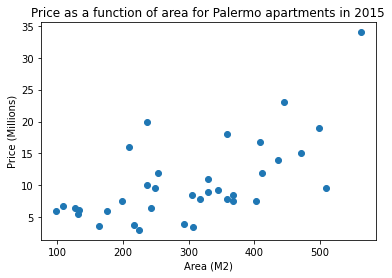

In [ ]:
plt.scatter(data_pal_2015.M2,data_pal_2015.USD/100000)
plt.xlabel('Area (M2)')
plt.ylabel('Price (Millions)')
plt.title('Price as a function of area for Palermo apartments in 2015')

In [ ]:
x_data=data_pal_2015.M2
y_data=data_pal_2015.USD/100000

Text(0.5, 1.0, 'Price as a function of area for Palermo apartments in 2016')

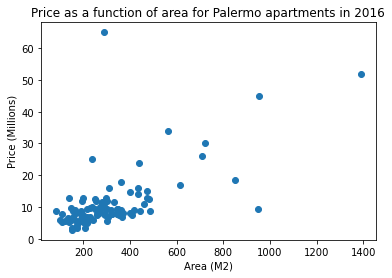

In [ ]:
plt.scatter(data_pal_2016.M2,data_pal_2016.USD/100000)
plt.xlabel('Area (M2)')
plt.ylabel('Price (Millions)')
plt.title('Price as a function of area for Palermo apartments in 2016')

Text(0.5, 1.0, 'Price as a function of area for Palermo apartments in 2017')

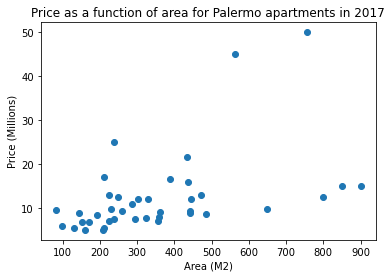

In [ ]:
plt.scatter(data_pal_2017.M2,data_pal_2017.USD/100000)
plt.xlabel('Area (M2)')
plt.ylabel('Price (Millions)')
plt.title('Price as a function of area for Palermo apartments in 2017')

Text(0.5, 1.0, 'Price as a function of area for Palermo apartments in 2018')

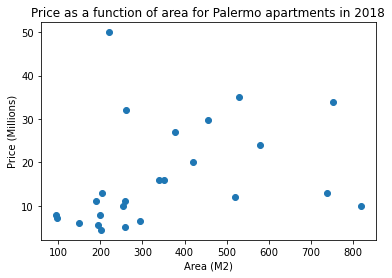

In [ ]:
plt.scatter(data_pal_2018.M2,data_pal_2018.USD/100000)
plt.xlabel('Area (M2)')
plt.ylabel('Price (Millions)')
plt.title('Price as a function of area for Palermo apartments in 2018')

In [ ]:
area_pal_2014=np.array(data_pal_2014.M2)
price_pal_2014=np.array(data_pal_2014.USD)

In [ ]:
price_pal_2014=price_pal_2014/100000

Text(0.5, 1.0, 'Price as a function of area for Palermo apartments in 2014')

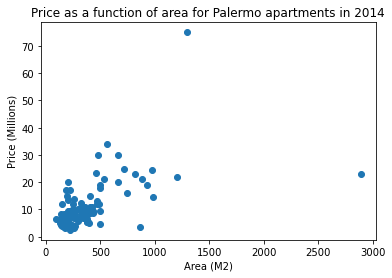

In [ ]:
plt.scatter(area_pal_2014,price_pal_2014)
plt.xlabel('Area (M2)')
plt.ylabel('Price (Millions)')
plt.title('Price as a function of area for Palermo apartments in 2014')

In [ ]:
#separating data for palermo into arrays for price and area
area_pal=np.array(data_pal.M2)
price_pal=np.array(data_pal.USD)

In [ ]:
price_pal=price_pal/100000

Text(0.5, 1.0, 'Price as a function of area for Palermo apartments from 2014 to 2018')

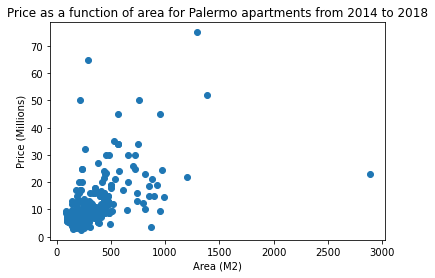

In [ ]:
#data for palermo
plt.scatter(area_pal, price_pal)
plt.xlabel('Area (M2)')
plt.ylabel('Price (Millions)')
plt.title('Price as a function of area for Palermo apartments from 2014 to 2018')

## Priors

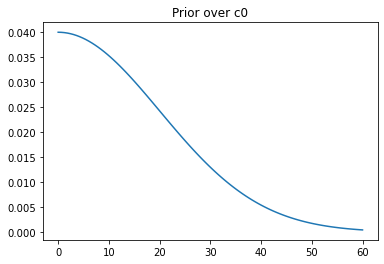

In [ ]:
import scipy.stats as stats
mu=0
sigma=20
x = np.linspace(0,mu + 3 * sigma, 100)
plt.plot(x, stats.halfnorm.pdf(x, mu, sigma))
plt.title('Prior over c0')
plt.show()

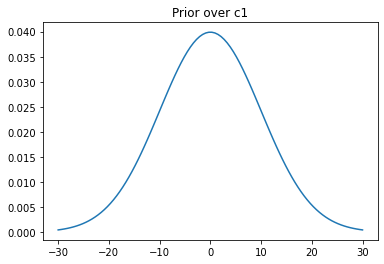

In [ ]:
mu=0
sigma=10
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Prior over c1')
plt.show()

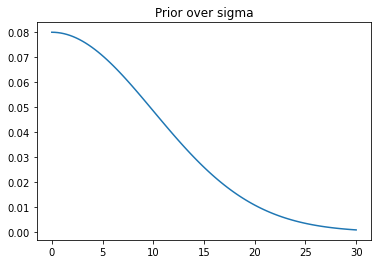

In [ ]:
mu=0
sigma=10
x = np.linspace(0, mu + 3 * sigma, 100)
plt.plot(x, stats.halfnorm.pdf(x, mu, sigma))
plt.title('Prior over sigma')
plt.show()

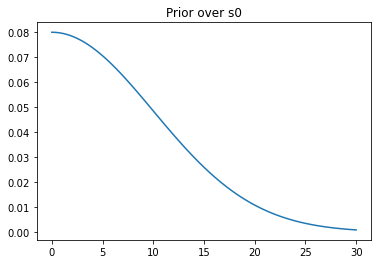

In [ ]:
mu=0
sigma=10
x = np.linspace(0, mu + 3 * sigma, 100)
plt.plot(x, stats.halfnorm.pdf(x, mu, sigma))
plt.title('Prior over s0')
plt.show()

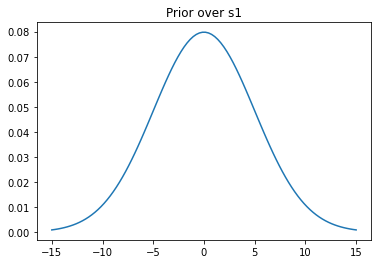

In [ ]:
mu=0
sigma=5
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Prior over s1')
plt.show()

For c0 and s0 I chose HalfNormal priors because they are intercepts, and we know that they can not be below 0 (price for the apartment can not be negative, as well as the variance in the price can not be negative). HalfNormal achieves this goal of constraining values to greater or equal to 0, while still assigning enough probability to large values of c0 and s0 : 2SD for c0 encompase value of 40 and for s0 - 20. If I wanted to increase the range and assign more probability to larger values, I could increase the sigma parameter of the distributions, but these values and distributions that I use seem reasonable given the model results and x and y data ranges.

For c1 and s1 I used Normal priors because these are the intercepts and we have no reason to prefer negative or positive values. This prior also makes sure we do not get extremely large values for the slope (it seems unlikely), while still assigning some very small probability to them just in case. Uniform priors could also be used, but they do not assign any probability to extremely large values. Also, they caused some problems with the sampling.

For sigma I also used HalfNormal for the same reasons as above: variance can not be negative so we restrict it to positive values.

## Models

NORMAL LINEAR HOMOSCEDASTIC MODEL

Code for the Normal, T models, and sampling diagnostics was adapted from CS146 Session 8- Robust Linear Regression pre-class workbook.

Code for the Heteroscedastic models was adapted from CS146 Session 9 - Linear Regression for non-linear data in-class workbook.

Code for plotting posterior-predictive credible intervals and posterior credible intervals for the mean was adapted from CS146 Session 7 - Linear Regression pre-class workbook.

In [ ]:
with pm.Model() as normal_model:
    
    # Prior
    c0 = pm.HalfNormal('c0',sigma=20)
    c1 = pm.Normal('c1', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma',sigma=10)
    
    # Data
    x = pm.MutableData('x', x_data)
    y = pm.MutableData('y', y_data)
    
    # Regression mean
    mu = pm.Deterministic('mu', c0 + c1* x)
    
    # Likelihood
    pm.Normal('likelihood', mu=mu, sigma=sigma, observed=y)

In [ ]:
#sampling
with normal_model:
    normal_inference = pm.sample(2000,tune=6000,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c0, c1, sigma]


Sampling 4 chains for 6_000 tune and 2_000 draw iterations (24_000 + 8_000 draws total) took 101 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c0,2.095,1.481,0.001,4.710,0.033,0.023,1884.0,2323.0,1.0
c1,0.028,0.005,0.019,0.038,0.000,0.000,2050.0,2822.0,1.0
sigma,5.297,0.678,4.077,6.570,0.012,0.009,3173.0,3305.0,1.0


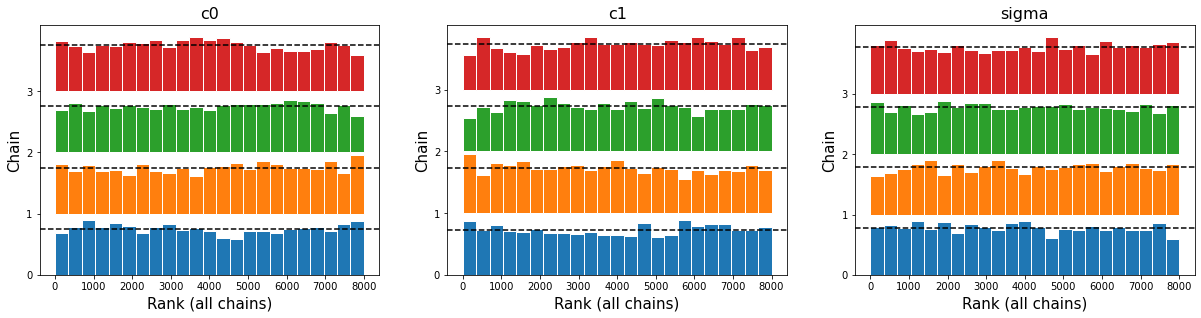

In [ ]:
#generating diagnostics for sampler
az.plot_rank(normal_inference, var_names=['c0', 'c1','sigma' ])
az.summary(normal_inference, var_names=['c0', 'c1','sigma'])

In [ ]:
#sampling from the posterior predictive
mu_pred =normal_inference.posterior["mu"]
normal_inference_thinned = normal_inference.sel(draw=slice(None, None, 5))
with normal_model:
    price_pred = pm.sample_posterior_predictive(normal_inference_thinned)

Text(0, 0.5, 'Price (Millions)')

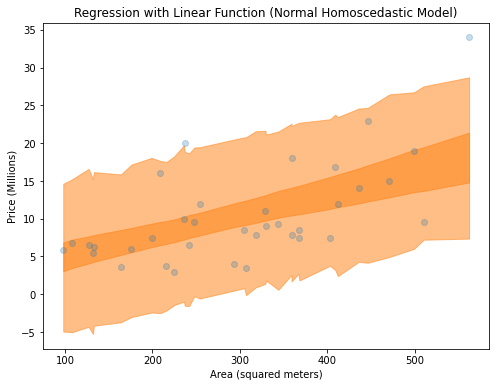

In [ ]:
#plotting credible intervals for posterior predictive distribution and mean
plt.figure(figsize=(8, 6))
plt.title('Regression with Linear Function (Normal Homoscedastic Model)')
ax = az.plot_hdi(x_data, mu_pred, smooth=False)
az.plot_hdi(x_data, price_pred.posterior_predictive["likelihood"], ax=ax, smooth=False)
plt.scatter(x_data, y_data, c="C0", alpha=0.25)
plt.xlabel("Area (squared meters)")
plt.ylabel("Price (Millions)")

NORMAL LINEAR HETEROSCEDASTIC MODEL

In [ ]:
with pm.Model() as normal_model_het:
    
    # Prior
    c0 = pm.HalfNormal('c0',sigma=20)
    c1 = pm.Normal('c1', mu=0, sigma=10)
    
    # sigma = pm.LogNormal('sigma',mu=0,sigma=20)
    s0 = pm.HalfNormal('s0',sigma=10)
    s1 = pm.Normal('s1', mu=0, sigma=5)
    
    # Data
    x = pm.MutableData('x', x_data)
    y = pm.MutableData('y', y_data)
    
    # Regression mean
    mu = pm.Deterministic('mu', c0 + c1 * x)
    sigma=pm.Deterministic('sigma',s0 + s1 * x)
    #mu=c0+c1*x
    #sigma=s0+s1*x
    
    # Likelihood
    pm.Normal('likelihood', mu=mu, sigma=sigma, observed=y)


In [ ]:
with normal_model_het:
    normal_inference_het = pm.sample(2000,tune=6000,target_accept=0.97)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c0, c1, s0, s1]


Sampling 4 chains for 6_000 tune and 2_000 draw iterations (24_000 + 8_000 draws total) took 130 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
from arviz.utils import conditional_jit, Numba
Numba.disable_numba()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c0,2.877,1.475,0.227,5.465,0.034,0.024,1772.0,1607.0,1.0
c1,0.025,0.006,0.013,0.035,0.000,0.000,2042.0,2567.0,1.0
s0,1.306,1.081,0.000,3.264,0.023,0.016,1836.0,1851.0,1.0
s1,0.013,0.004,0.005,0.020,0.000,0.000,2259.0,3055.0,1.0


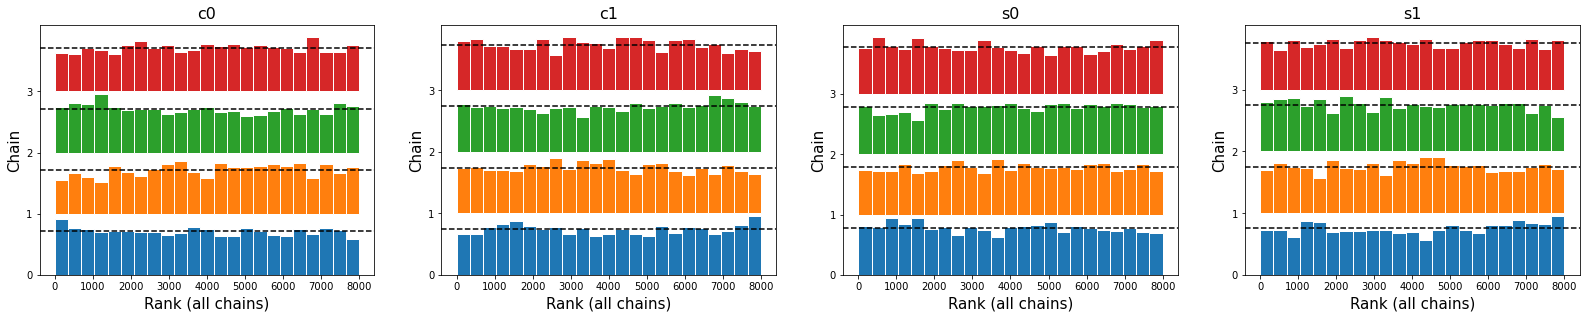

In [ ]:
az.plot_rank(normal_inference_het, var_names=['c0', 'c1','s0','s1' ])
az.summary(normal_inference_het, var_names=['c0', 'c1','s0','s1'])

In [ ]:
mu_pred_het =normal_inference_het.posterior["mu"]
normal_inference_het_thinned = normal_inference_het.sel(draw=slice(None, None, 5))
with normal_model_het:
    price_pred_het = pm.sample_posterior_predictive(normal_inference_het_thinned)

Text(0, 0.5, 'Price (Millions)')

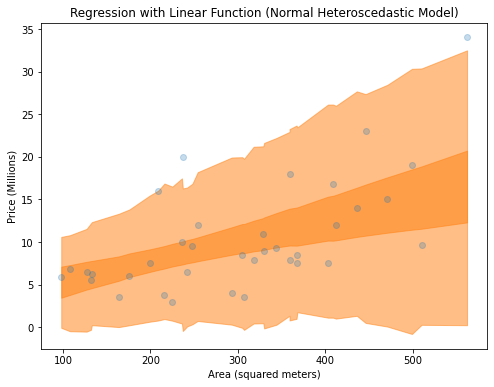

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regression with Linear Function (Normal Heteroscedastic Model)')
ax = az.plot_hdi(x_data, mu_pred_het, smooth=False)
az.plot_hdi(x_data, price_pred_het.posterior_predictive["likelihood"], ax=ax, smooth=False)
plt.scatter(x_data, y_data, c="C0", alpha=0.25)
plt.xlabel("Area (squared meters)")
plt.ylabel("Price (Millions)")

NORMAL QUADRATIC HOMOSCEDASTIC MODEL

In [ ]:
with pm.Model() as normal_model_quad:
    
    # Prior
    c0 = pm.HalfNormal('c0',sigma=20)
    c1 = pm.Normal('c1', mu=0, sigma=10,shape=2)
    sigma = pm.HalfNormal('sigma',sigma=10)
    
    # Data
    x = pm.MutableData('x', x_data)
    y = pm.MutableData('y', y_data)
    
    # Regression mean
    mu = pm.Deterministic('mu', c0 + c1[0] * x+c1[1]*x**2)
    #mu=c0 + c1[0] * x+c1[1]*x**2
    
    # Likelihood
    pm.Normal('likelihood', mu=mu, sigma=sigma, observed=y)

In [ ]:
with normal_model_quad:
    normal_inference_quad = pm.sample(2000,tune=5000,target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c0, c1, sigma]


Sampling 4 chains for 5_000 tune and 2_000 draw iterations (20_000 + 8_000 draws total) took 200 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c0,10.321,4.584,1.362,18.753,0.113,0.080,1573.0,1061.0,1.0
c1[0],-0.041,0.032,-0.099,0.022,0.001,0.001,1552.0,1313.0,1.0
c1[1],0.000,0.000,0.000,0.000,0.000,0.000,1661.0,1738.0,1.0
sigma,4.966,0.621,3.860,6.118,0.012,0.008,2853.0,3247.0,1.0


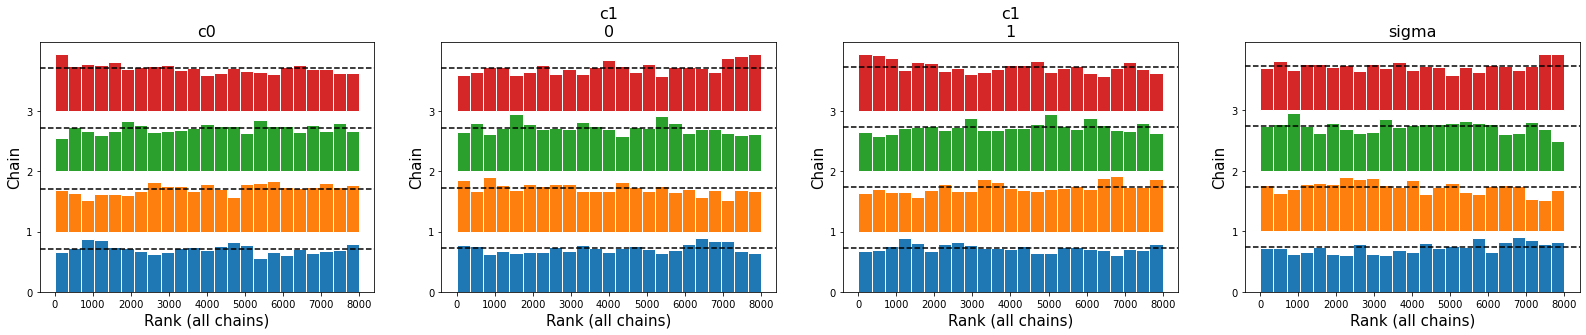

In [ ]:
az.plot_rank(normal_inference_quad, var_names=['c0', 'c1','sigma' ])
az.summary(normal_inference_quad, var_names=['c0', 'c1','sigma'])

In [ ]:
mu_pred_quad =normal_inference_quad.posterior["mu"]
normal_inference_thinned_quad = normal_inference_quad.sel(draw=slice(None, None, 5))
with normal_model_quad:
    price_pred_quad = pm.sample_posterior_predictive(normal_inference_thinned_quad)

Text(0, 0.5, 'Price (Millions)')

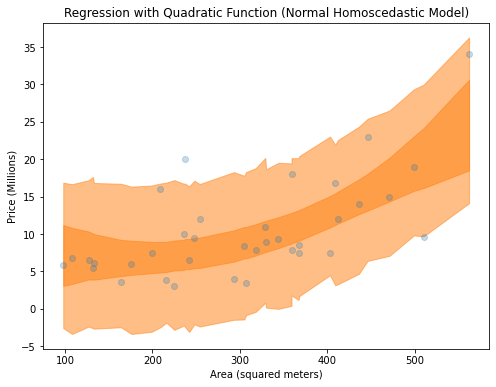

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regression with Quadratic Function (Normal Homoscedastic Model)')
ax = az.plot_hdi(x_data, mu_pred_quad, smooth=False)
az.plot_hdi(x_data, price_pred_quad.posterior_predictive["likelihood"], ax=ax, smooth=False)
plt.scatter(x_data, y_data, c="C0", alpha=0.25)
plt.xlabel("Area (squared meters)")
plt.ylabel("Price (Millions)")

NORMAL QUADRATIC HETEROSCEDASTIC MODEL

In [ ]:
with pm.Model() as normal_model_quad_het:
    
    # Prior
    c0 = pm.HalfNormal('c0', sigma=20)
    c1 = pm.Normal('c1', mu=0, sigma=10,shape=2)
    s0 = pm.HalfNormal('s0',  sigma=10)
    s1 = pm.Normal('s1', mu=0, sigma=5,shape=2)

    # Data
    x = pm.MutableData('x',x_data)
    y = pm.MutableData('y', y_data)
    
    # Regression mean
    mu = pm.Deterministic('mu', c0 + c1[0] * x+c1[1]*x**2)
    sigma=pm.Deterministic('sigma',s0 + s1[0]* x+s1[1]*x**2)
    #mu=c0 + c1[0] * x+c1[1]*x**2
    #sigma=s0 + s1[0]* x+s1[1]*x**2
    
    # Likelihood
    pm.Normal('likelihood', mu=mu, sigma=sigma, observed=y)

In [ ]:
with normal_model_quad_het:
    normal_inference_quad_het = pm.sample(2000,tune=2000,target_accept=0.98)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c0, c1, s0, s1]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 149 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c0,8.293,4.398,0.004,15.709,0.129,0.091,1089.0,1540.0,1.0
c1[0],-0.023,0.033,-0.084,0.040,0.001,0.001,1141.0,1897.0,1.0
c1[1],0.000,0.000,-0.000,0.000,0.000,0.000,1264.0,2290.0,1.0
s0,3.974,3.898,0.001,11.549,0.112,0.088,1463.0,1590.0,1.0
s1[0],-0.004,0.024,-0.054,0.029,0.001,0.001,1481.0,1366.0,1.0
s1[1],0.000,0.000,-0.000,0.000,0.000,0.000,1628.0,1501.0,1.0


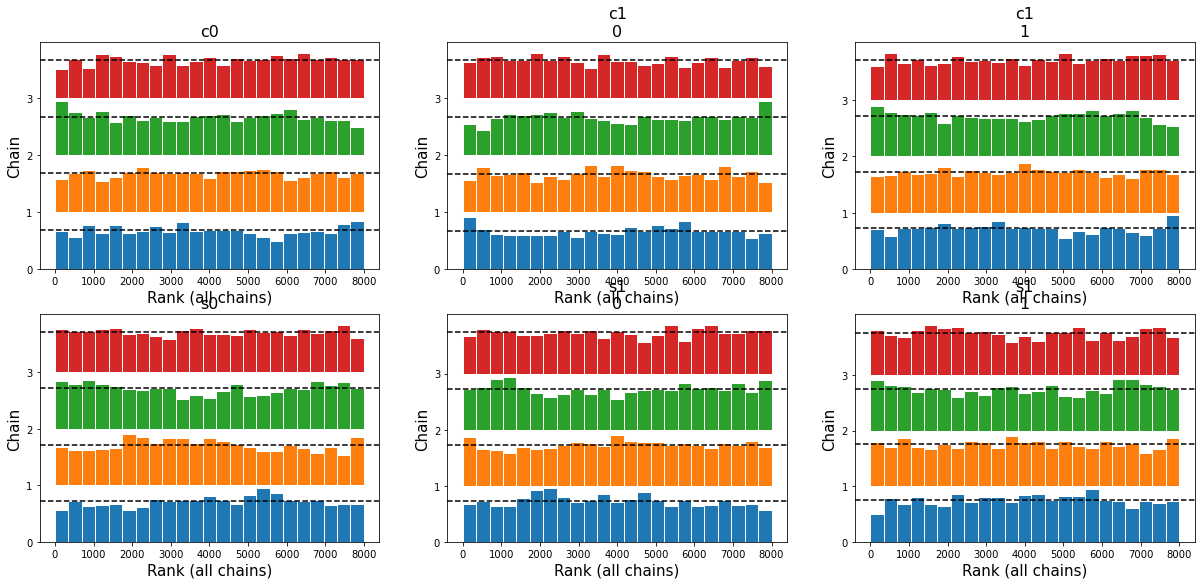

In [ ]:
az.plot_rank(normal_inference_quad_het, var_names=['c0', 'c1','s0','s1' ])
az.summary(normal_inference_quad_het, var_names=['c0', 'c1','s0','s1'])

In [ ]:
mu_pred_quad_het =normal_inference_quad_het.posterior["mu"]
normal_inference_thinned_quad_het = normal_inference_quad_het.sel(draw=slice(None, None, 5))
with normal_model_quad_het:
    price_pred_quad_het = pm.sample_posterior_predictive(normal_inference_thinned_quad_het)

Text(0, 0.5, 'Price (Millions)')

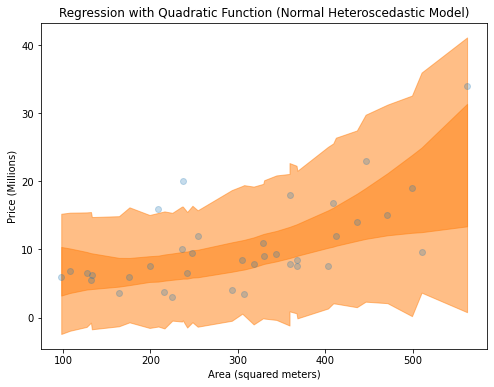

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regression with Quadratic Function (Normal Heteroscedastic Model)')
ax = az.plot_hdi(x_data, mu_pred_quad_het, smooth=False)
az.plot_hdi(x_data, price_pred_quad_het.posterior_predictive["likelihood"], ax=ax, smooth=False)
plt.scatter(x_data, y_data, c="C0", alpha=0.25)
plt.xlabel("Area (squared meters)")
plt.ylabel("Price (Millions)")

T-MODEL LINEAR HOMOSCEDASTIC


In [ ]:
with pm.Model() as t_model:
    
    # Prior
    c0 = pm.HalfNormal('c0',sigma=20)
    c1 = pm.Normal('c1', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma',sigma=10)
    nu = pm.HalfNormal('nu', sigma=30)
    
    # Data
    x = pm.MutableData('x', x_data)
    y = pm.MutableData('y', y_data)
    
    # Regression mean
    mu = pm.Deterministic('mu', c0 + c1 * x)
    
    # Likelihood
    pm.StudentT('likelihood', nu=nu, 
                mu=mu, sigma=sigma, observed=y)

In [ ]:
with t_model:
    t_inference = pm.sample(2000,tune=10000,target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c0, c1, sigma, nu]


Sampling 4 chains for 10_000 tune and 2_000 draw iterations (40_000 + 8_000 draws total) took 153 seconds.
The acceptance probability does not match the target. It is 0.7962, but should be close to 0.9. Try to increase the number of tuning steps.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c0,2.354,1.573,0.001,5.030,0.033,0.023,2027.0,1928.0,1.0
c1,0.026,0.006,0.015,0.036,0.000,0.000,2053.0,1792.0,1.0
sigma,4.477,0.908,2.610,6.085,0.021,0.015,1978.0,1665.0,1.0
nu,17.127,15.589,0.918,47.358,0.304,0.215,1902.0,2219.0,1.0


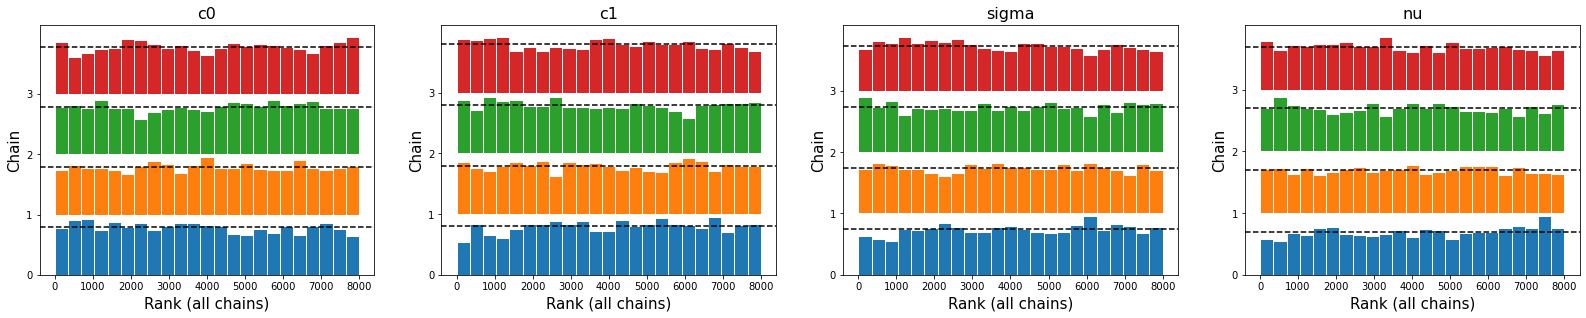

In [ ]:
az.plot_rank(t_inference, var_names=['c0', 'c1','sigma','nu' ])
az.summary(t_inference, var_names=['c0', 'c1','sigma','nu'])

In [ ]:
mu_pred_t =t_inference.posterior["mu"]
t_inference_all_thinned = t_inference.sel(draw=slice(None, None, 5))
with t_model2:
    price_pred_t = pm.sample_posterior_predictive(t_inference_all_thinned)

Text(0, 0.5, 'Price (Millions)')

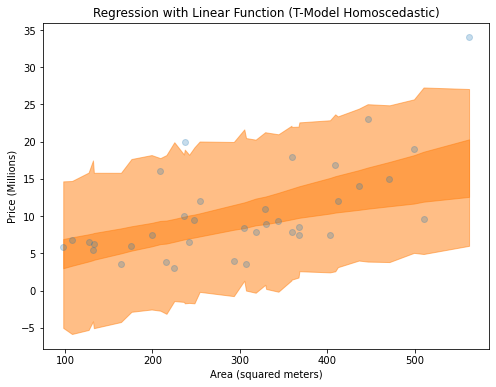

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regression with Linear Function (T-Model Homoscedastic)')
ax = az.plot_hdi(x_data, mu_pred_t, smooth=False)
az.plot_hdi(x_data, price_pred_t.posterior_predictive["likelihood"], ax=ax, smooth=False)
plt.scatter(x_data, y_data, c="C0", alpha=0.25)
plt.xlabel("Area (squared meters)")
plt.ylabel("Price (Millions)")

T-MODEL QUADRATIC HOMOSCEDASTIC

In [ ]:
with pm.Model() as t_model_quad:
    
    # Prior
    c0 = pm.HalfNormal('c0',sigma=20)
    c1 = pm.Normal('c1', mu=0, sigma=10,shape=2)
    sigma = pm.HalfNormal('sigma',sigma=10)
    nu = pm.HalfNormal('nu', sigma=30)
    
    # Data
    x = pm.MutableData('x', x_data)
    y = pm.MutableData('y', y_data)
    
    # Regression mean
    mu = pm.Deterministic('mu', c0 + c1[0] * x+c1[1]*x**2)
    
    # Likelihood
    pm.StudentT('likelihood', nu=nu, 
                mu=mu, sigma=sigma, observed=y)

In [ ]:
with t_model_quad:
    t_quad_inference = pm.sample(2000,tune=5000,target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c0, c1, sigma, nu]


Sampling 4 chains for 5_000 tune and 2_000 draw iterations (20_000 + 8_000 draws total) took 251 seconds.
The acceptance probability does not match the target. It is 0.8117, but should be close to 0.9. Try to increase the number of tuning steps.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c0,10.487,4.133,2.836,18.411,0.095,0.068,1837.0,2150.0,1.0
c1[0],-0.046,0.030,-0.103,0.011,0.001,0.000,1804.0,2250.0,1.0
c1[1],0.000,0.000,0.000,0.000,0.000,0.000,1916.0,2432.0,1.0
sigma,4.210,0.885,2.503,5.921,0.023,0.017,1499.0,1244.0,1.0
nu,18.272,16.667,0.835,49.966,0.344,0.243,1516.0,1542.0,1.0


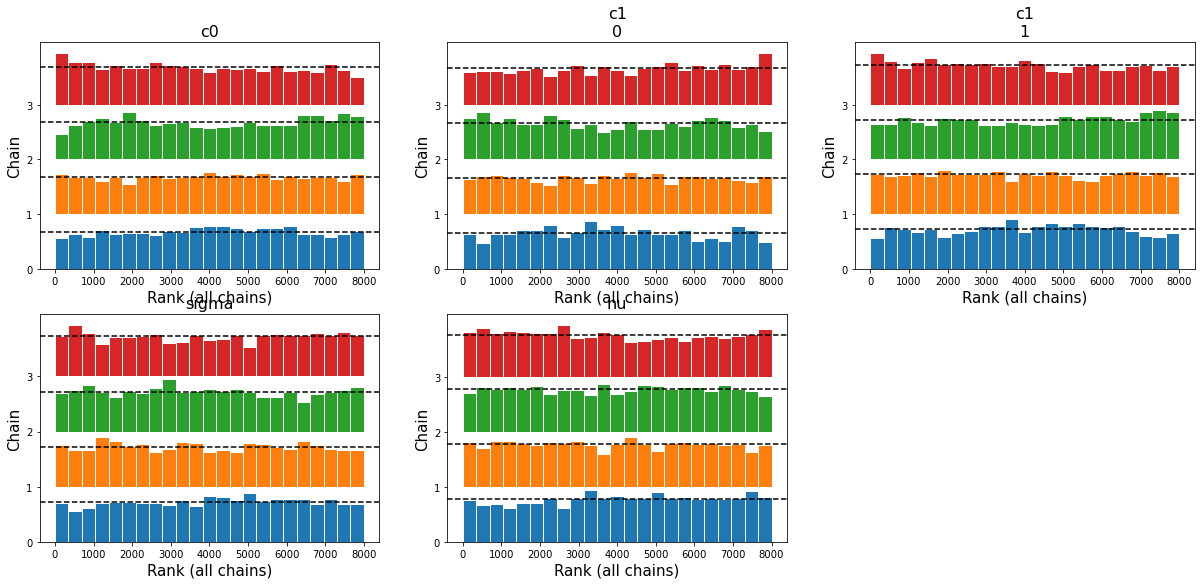

In [ ]:
az.plot_rank(t_quad_inference, var_names=['c0', 'c1','sigma','nu' ])
az.summary(t_quad_inference, var_names=['c0', 'c1','sigma','nu'])

In [ ]:
mu_pred_t_quad =t_quad_inference.posterior["mu"]
t_quad_inference_thinned = t_quad_inference.sel(draw=slice(None, None, 5))
with t_model_quad:
    price_pred_t_quad = pm.sample_posterior_predictive(t_quad_inference_thinned)

Text(0, 0.5, 'Price (Millions)')

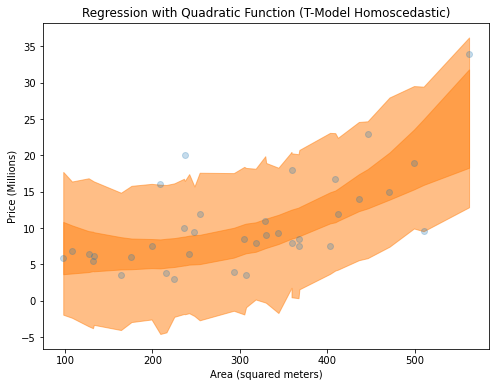

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regression with Quadratic Function (T-Model Homoscedastic)')
ax = az.plot_hdi(x_data, mu_pred_t_quad, smooth=False)
az.plot_hdi(x_data, price_pred_t_quad.posterior_predictive["likelihood"], ax=ax, smooth=False)
plt.scatter(x_data, y_data, c="C0", alpha=0.25)
plt.xlabel("Area (squared meters)")
plt.ylabel("Price (Millions)")

T-MODEL LINEAR HETEROSCEDASTIC

In [ ]:
with pm.Model() as t_model_het:
    
    # Prior
    c0 = pm.HalfNormal('c0',sigma=20)
    c1 = pm.Normal('c1', mu=0, sigma=10)
    s0=pm.HalfNormal('s0',sigma=10)
    s1=pm.Normal('s1',mu=0,sigma=10)
    nu = pm.HalfNormal('nu', sigma=30)
    
    # Data
    x = pm.MutableData('x', x_data)
    y = pm.MutableData('y', y_data)
    
    # Regression mean
    mu = pm.Deterministic('mu', c0 + c1 * x)
    sigma=pm.Deterministic('sigma',s0+s1*x)
    
    # Likelihood
    pm.StudentT('likelihood', nu=nu, 
                mu=mu, sigma=sigma, observed=y)

In [ ]:
with t_model_het:
    t_het_inference = pm.sample(2000,tune=5000,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c0, c1, s0, s1, nu]


Sampling 4 chains for 5_000 tune and 2_000 draw iterations (20_000 + 8_000 draws total) took 160 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c0,2.910,1.401,0.236,5.340,0.028,0.019,2439.0,2014.0,1.0
c1,0.023,0.006,0.013,0.034,0.000,0.000,2712.0,3583.0,1.0
s0,1.164,0.990,0.000,2.994,0.018,0.012,2532.0,2219.0,1.0
s1,0.011,0.004,0.004,0.018,0.000,0.000,3094.0,3671.0,1.0
nu,22.573,17.165,1.237,53.873,0.255,0.180,3358.0,4000.0,1.0


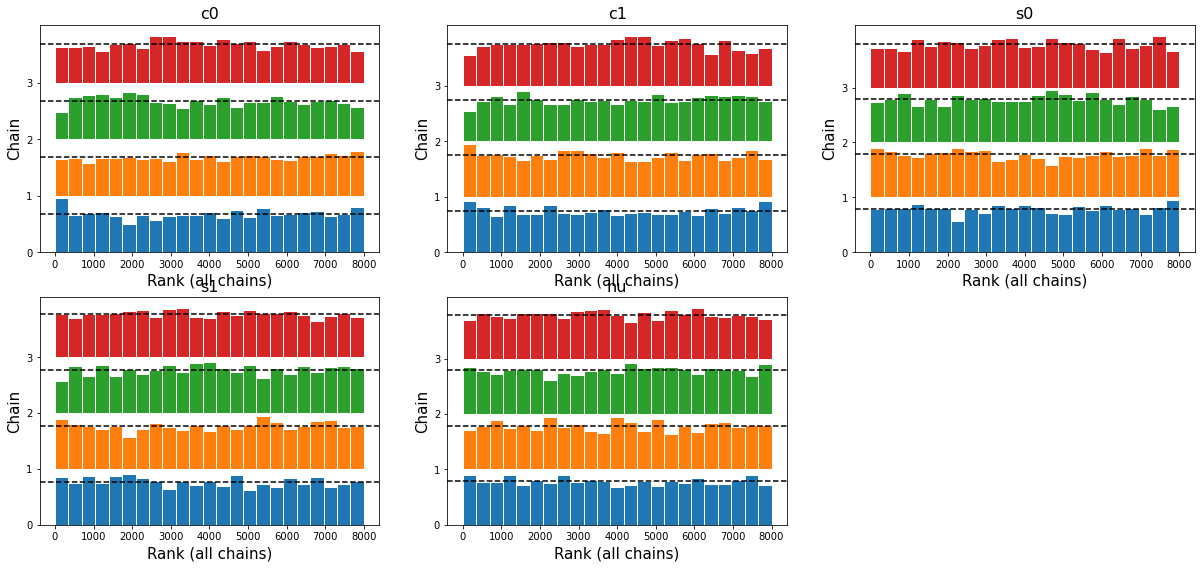

In [ ]:
az.plot_rank(t_het_inference, var_names=['c0', 'c1','s0','s1','nu' ])
az.summary(t_het_inference, var_names=['c0', 'c1','s0','s1','nu'])

In [ ]:
mu_pred_t_het =t_het_inference.posterior["mu"]
t_het_inference_thinned = t_het_inference.sel(draw=slice(None, None, 5))
with t_model_het:
    price_pred_t_het = pm.sample_posterior_predictive(t_het_inference_thinned)

Text(0, 0.5, 'Price (Millions)')

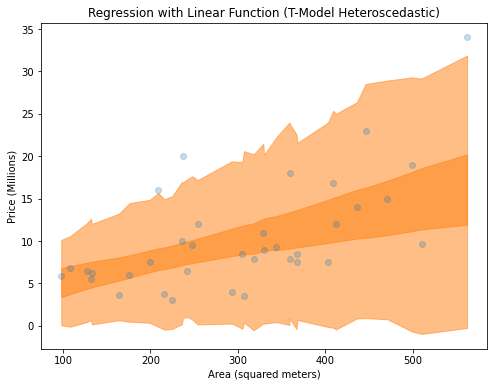

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regression with Linear Function (T-Model Heteroscedastic)')
ax = az.plot_hdi(x_data, mu_pred_t_het, smooth=False)
az.plot_hdi(x_data, price_pred_t_het.posterior_predictive["likelihood"], ax=ax, smooth=False)
plt.scatter(x_data, y_data, c="C0", alpha=0.25)
plt.xlabel("Area (squared meters)")
plt.ylabel("Price (Millions)")

T-MODEL QUADRATIC HETEROSCEDASTIC

In [ ]:
with pm.Model() as t_model_quad_het:
    
    # Prior
    c0 = pm.HalfNormal('c0',sigma=20)
    c1 = pm.Normal('c1', mu=0, sigma=10,shape=2)
    s0=pm.LogNormal('s0',sigma=10)
    s1=pm.Normal('s1',mu=0,sigma=10,shape=2)
    nu = pm.HalfNormal('nu', sigma=30)
    
    # Data
    x = pm.MutableData('x', x_data)
    y = pm.MutableData('y', y_data)
    
    # Regression mean
    mu = pm.Deterministic('mu', c0 + c1[0] * x+c1[1]*x**2)
    sigma=pm.Deterministic('sigma',s0+s1[0]*x+s1[1]*x**2)
    #mu=c0 + c1[0] * x+c1[1]*x**2
    #sigma=s0+s1[0]*x+s1[1]*x**2
    
    # Likelihood
    pm.StudentT('likelihood', nu=nu, 
                mu=mu, sigma=sigma, observed=y)

In [ ]:
with t_model_quad_het:
    t_quad_het_inference = pm.sample(2000,tune=2000,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c0, c1, s0, s1, nu]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 559 seconds.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 28 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c0,7.860,2.846,2.450,13.185,0.072,0.051,1509.0,1948.0,1.0
c1[0],-0.025,0.027,-0.076,0.024,0.001,0.000,1636.0,1725.0,1.0
c1[1],0.000,0.000,-0.000,0.000,0.000,0.000,1789.0,2448.0,1.0
s0,0.163,0.510,0.000,0.794,0.023,0.024,1625.0,1119.0,1.0
s1[0],0.013,0.007,-0.001,0.027,0.000,0.000,1616.0,1029.0,1.0
s1[1],0.000,0.000,-0.000,0.000,0.000,0.000,2277.0,2192.0,1.0
nu,15.809,15.561,0.980,45.613,0.257,0.182,3179.0,5529.0,1.0


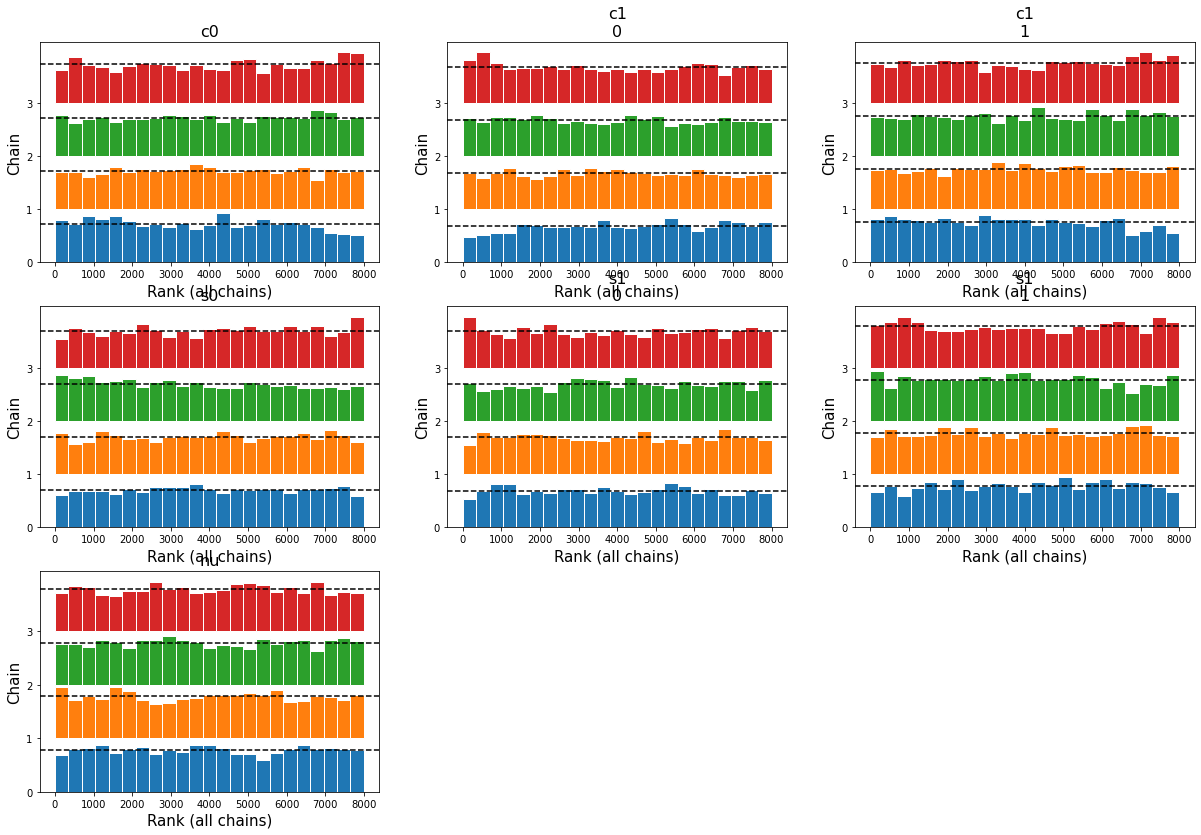

In [ ]:
az.plot_rank(t_quad_het_inference, var_names=['c0', 'c1','s0','s1','nu' ])
az.summary(t_quad_het_inference, var_names=['c0', 'c1','s0','s1','nu'])

In [ ]:
mu_pred_t_quad_het =t_quad_het_inference.posterior["mu"]
t_quad_het_inference_thinned = t_quad_het_inference.sel(draw=slice(None, None, 5))
with t_model_quad_het:
    price_pred_t_quad_het = pm.sample_posterior_predictive(t_quad_het_inference_thinned)

Text(0, 0.5, 'Price (Millions)')

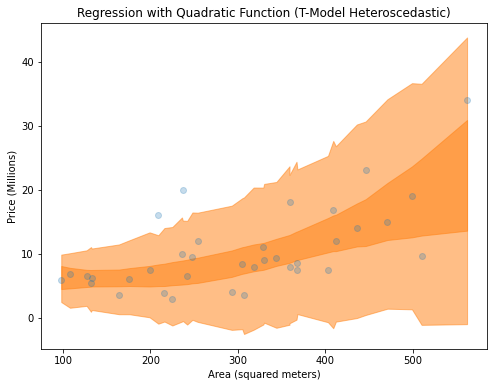

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regression with Quadratic Function (T-Model Heteroscedastic)')
ax = az.plot_hdi(x_data, mu_pred_t_quad_het, smooth=False)
az.plot_hdi(x_data, price_pred_t_quad_het.posterior_predictive["likelihood"], ax=ax, smooth=False)
plt.scatter(x_data, y_data, c="C0", alpha=0.25)
plt.xlabel("Area (squared meters)")
plt.ylabel("Price (Millions)")

After reviewing the sampling diagnostics for all the models above, we see that the r_hat is always <=1.01 (even though some models' samplers showed some divergences) and effective sample size is at least 10% of the sample size for all the models. These values indicate that the sampler probably worked fine and there is no reason to think otherwise. To reduce the number of divergences and improve samplers, I had to run models multiple times with different tuning steps and acceptance rates.

Looking at the rank plots, we can see that for all the models the plots look good. For each of the parameters, all 4 chains are very similar and not skewed (uniform), which means each chain was randomly sampling from the whole posterior and not missing parts. This is another indicator that the samplers probably worked well.

The posterior predictive plots for each model represent 89% credible interval for the mean price (narrower darker region) and 89% credible interval for the price (lighter wider region). We can see that for all models, they fit reasonably well given how scattered the data are, with quite few data points and some outliers.

We can see that both intervals are quite wide, which is explained by a small amount of data points and scatterness. If you look at the right end, where there are fewer and more scattered data points, you can see the intervals getting wider because there is more uncertainty. If we compare homoscedastic and heteroscedastic models (the sigma parameter is allowed to vary across the data set), we can see that in the first case the intervals have constant width, while in the second case the intervals are narrower where the data are narrower, and wider when the data is wider. For example, the outlier in the top right corner is not captured by the homoscedastic linear models, but is captured by all heteroscedastic ones (the credible intervals get extremely large because there is only 1 data point in that area and high uncertainty). When comparing quadratic and linear models, we can see that linear homoscedastic ones tend to ignore the outlier described above, while quadratic capture it and also follow the weak upward bent trend a bit better than linear models. When comparing t-model and normal model plots, I did not notice any striking difference between 2 model types.

MODEL COMPARISON

In [ ]:
comparison = az.compare({'Normal Linear Homoscedastic Model': normal_inference, 'Normal Linear Heteroscedastic Model': normal_inference_het, 
                         'Normal Quadratic Homoscedastic Model': normal_inference_quad, 'Normal Quadratic Heteroscedastic Model': normal_inference_quad_het,
                        'T Linear Homoscedastic Model': t_inference_all, 'T Linear Heteroscedastic Model': t_het_inference,
                         'T Quadratic Homoscedastic Model': t_quad_inference,'T Quadratic Heteroscedastic Model': t_quad_het_inference}, ic='loo', scale='deviance')
display(comparison)
az.plot_compare(comparison)

Firstly, we can see that for some models there is warning generated. I found online that the way to fix it is to define mu and sigma in models without pm.Deterministic part (you can see what I tried in model comments). I tried it and it did work: it got rid of the warnings. However, this way I could not generate posterior predictive plots because it told me the variables where not defined, so I put everything as it was originally and disregarded the warnings. 

From the plot above we see that T quadratic heteroscedastic model is the best: has smallest deviance. However, If you look at the next top 3 models, their error bars (triangles with the bars) overlap with each other and the best model, which tells us that we are not really certain that  T quadratic heteroscedastic model is the best in terms of generating better predictions. We use deviance as a metric because it is a good measurement of how well the model makes out-of-sample predictions. It is calculated here as a PSIS approximation of cross validation leave one out method (divide data into chunks, leaving out one data point at a time and computing the posteior), which is as a sum of log scores for each individual data point given the posterior, and then multiplied by -2.

## References

CS146 Session 7. (2022). Structured learning exercise document. https://sle-collaboration.minervaproject.com/?id=5563b049-d419-44e6-b002-779dbe6fb4fd&userId=10861&name=Vlad+Andreichuk&avatar=https%3A//s3.amazonaws.com/picasso.fixtures/Uladzislau_Andreichuk_10861_2020-09-02T12%3A14%3A18.030Z&iframed=1&readOnly=0&isInstructor=0&enableSavingIndicators=1&signature=b5a4431e83cd73e369ee59aace4c7c08628e87cec90896c6f72134cc129ccb47

CS146 Session 8. (2022). Structured learning exercise document. https://sle-collaboration.minervaproject.com/?id=92ec1af0-5926-48fb-82f1-093ff6ec76c2&userId=10861&name=Vlad+Andreichuk&avatar=https%3A//s3.amazonaws.com/picasso.fixtures/Uladzislau_Andreichuk_10861_2020-09-02T12%3A14%3A18.030Z&iframed=1&readOnly=0&isInstructor=0&enableSavingIndicators=1&signature=f4e5b96443727d70428cc628e44d9794904dd0c838936e40f520c3c3d2621e2a

CS146 Session 9. (2022). Structured learning exercise document. https://sle-collaboration.minervaproject.com/?id=4a280bcc-24bc-46df-b23d-fed73467d887&userId=10861&name=Vlad+Andreichuk&avatar=https%3A//s3.amazonaws.com/picasso.fixtures/Uladzislau_Andreichuk_10861_2020-09-02T12%3A14%3A18.030Z&noPresence=1&readOnly=1&isInstructor=0&signature=0048a41be82a2744ad715adc44c8c212a7a79794891855d055631b25e6c986b3

Model comparison issue with LOO? (2018, January 29). PyMC Discourse. https://discourse.pymc.io/t/model-comparison-issue-with-loo/794